## HW1: Train a perceptron model

<a href="https://colab.research.google.com/drive/1Pkm_ZfXs2vEO8Vzynj55CkTo5ZMjemV-?usp=sharing">Colab file address</a>

In this homework, you will train a perceptron model with a simple dataset.

**Notes:** 
- When you submit your assignment, the output of every cell should be visible.
- You are not eligible to change any parts of the code except the predefined sections.
- You can add your implementation only in the predefined sections.



In [1]:
#@title Student Information
#@markdown Enter the following info and run the cell:
Name = "Poorya MohammadiNasab" #@param {type:"string"}
StudentNumber =  400722138#@param {type:"integer"}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Dataset

In [3]:
################################
## Change directory to the folder of the dataset
## For example, if the dataset is in NN/HW1 of your google drive, you should use this code in colab:
## cd drive/MyDrive/NN/HW1
################################

In [4]:
cd drive/MyDrive/NN

[Errno 2] No such file or directory: 'drive/MyDrive/NN'
/content


In [5]:
pwd

'/content'

In [6]:
## Load the dataset
dataset = pd.read_csv("dataset.csv")

In [7]:
## Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
 2   y       500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [8]:
## See the five first rows of the dataset.
dataset.head()

,x1,x2,y
0,2.780914,3.649500,0
1,0.649471,4.428423,0
2,-3.393311,-1.439415,1
3,3.007704,2.896864,0
4,-3.745867,1.894699,1


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

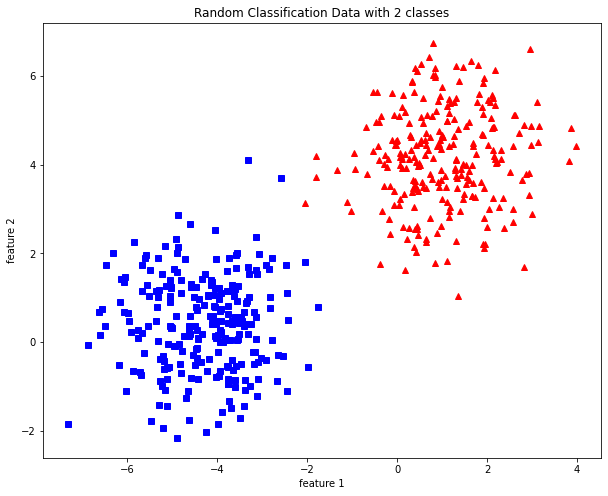

In [9]:
## Plot the dataset
X = dataset.drop(["y"], axis=1).values
y = dataset["y"].values

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [10]:
dataset.shape

(500, 3)

## Implement the algorithm

You have two weights and one bias. Let's call them w1 and w2 and b. Your have to code a simple gradient descent algorithm for updating these parameters. 

In [11]:
## Initialization of the parameters.
w1 = 0
w2 = 0
b = 0

In [12]:
def calculate_output(X, w1, w2, b):
    ##############################################
    ## code here
    ## y_out is the output of your neuron.
    ## First, you should implement this formula: y_out = w1 * x1 + w2 * x2 + b
    ## please be careful to calculate this formula for all of the 500 data
    ## Second, you should implement a Unit Step function as an activation function for each element of the y_out
    ## the y_out should be an array with a length of 500.
    ##############################################
    y_out = []
    
    for row in X:
        y_out.append(w1*row[0] + w2*row[1] + b)
    
    for i in range(len(y_out)):
        if(y_out[i] >= 0):
            y_out[i] = 1
        else:
            y_out[i] = 0
    
    return y_out

In [13]:
# test function
ret_arr = calculate_output(X,0.1,0.75,0.2)


print(len(ret_arr),end='\n\n\n\n')
print(ret_arr)

500



[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [14]:
## implement the gradient descent algorithm
lr = 0.1
num_epochs = 20


for i in range(num_epochs):
    y_out = calculate_output(X, w1, w2, b)
    errors = 0
    for j in range(X.shape[0]):
        if y[j] != y_out[j] :
            errors += 1
    ######################################
    ## code here
    ## implement the code for updating each parameter
    ######################################
    b = b - (1/len(X)) * lr * sum(y_out - y)
    w1 = w1 - (1/len(X)) * lr * X[:,0].T.dot(y_out - y) 
    w2 = w2 - (1/len(X)) * lr * X[:,1].T.dot(y_out - y) 

    print("in epoch : ", i, " errors : ", errors)

print("w1 : ", w1, "w2 : ", w2, "b : ", b)

in epoch :  0  errors :  250
in epoch :  1  errors :  93
in epoch :  2  errors :  6
in epoch :  3  errors :  5
in epoch :  4  errors :  4
in epoch :  5  errors :  4
in epoch :  6  errors :  3
in epoch :  7  errors :  3
in epoch :  8  errors :  3
in epoch :  9  errors :  3
in epoch :  10  errors :  3
in epoch :  11  errors :  3
in epoch :  12  errors :  3
in epoch :  13  errors :  2
in epoch :  14  errors :  2
in epoch :  15  errors :  2
in epoch :  16  errors :  2
in epoch :  17  errors :  2
in epoch :  18  errors :  2
in epoch :  19  errors :  2
w1 :  -0.15878375667301506 w2 :  -0.14610512401771092 b :  -0.020599999999999993


In [15]:
X[:,0].T.dot(y_out - y)

5.90245810952022

In [16]:
X.shape

(500, 2)

In [17]:
b - (1/len(X)) * lr * sum(y_out - y)

-0.020199999999999992

In [18]:
(y_out - y).shape

(500,)

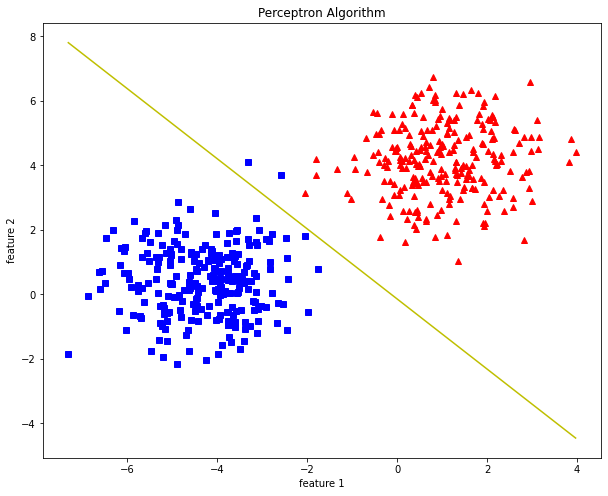

In [19]:
## Plot the result
x1 = [min(X[:,0]), max(X[:,0])]
m = -w1/w2
c = -b/w2
x2 = np.dot(m, x1) + c
    
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Perceptron Algorithm')
plt.plot(x1, x2, 'y-')

## Bonus Section
Explain learning rate decay and different methods for that.
Also, implement one of the methods of learning decay on the implemented code.

<h3 style="color:red"> Learning Rate Decay </h3>

Learning rate decay is a technique for training modern neural networks. It starts training the network with a large learning rate and then slowly reducing/decaying it until local minima is obtained. It is empirically observed to help both optimization and generalization.

<a href="https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b">Reference</a>

<h3 style="color:red"> Exponential Decay: </h3>

α = ( decayRate^(epochNumber) )*α0

α : learning rate (current iteration)

α0 : Initial learning rate

decayRate : hyper-parameter for the method


This function applies an exponential decay function to a provided initial learning rate so that learning rate decay over time , exponentially.
The decayRate of this method is always less then 1 , 0.95 is most commonly used among practitioners.

<h3 style="color:red"> implementation </h3>

In [20]:
## Initialization of the parameters.
w1 = 0
w2 = 0
b = 0

## implement the gradient descent algorithm with Learning rate decay
lr = 0.1
lr0 = 0.1
dr = 0.99
num_epochs = 20



for i in range(num_epochs):
    y_out = calculate_output(X, w1, w2, b)
    errors = 0
    for j in range(X.shape[0]):
        if y[j] != y_out[j] :
            errors += 1
    ######################################
    ## code here
    ## implement the code for updating each parameter
    ######################################
    b = b - (1/len(X)) * lr * sum(y_out - y)
    w1 = w1 - (1/len(X)) * lr * X[:,0].T.dot(y_out - y) 
    w2 = w2 - (1/len(X)) * lr * X[:,1].T.dot(y_out - y) 
    
    lr = (dr**i) * lr0
    print(lr)

    print("in epoch : ", i, " errors : ", errors)

print("w1 : ", w1, "w2 : ", w2, "b : ", b)

0.1
in epoch :  0  errors :  250
0.099
in epoch :  1  errors :  93
0.09801
in epoch :  2  errors :  6
0.0970299
in epoch :  3  errors :  5
0.096059601
in epoch :  4  errors :  4
0.09509900499
in epoch :  5  errors :  4
0.0941480149401
in epoch :  6  errors :  3
0.093206534790699
in epoch :  7  errors :  3
0.09227446944279201
in epoch :  8  errors :  3
0.09135172474836409
in epoch :  9  errors :  3
0.09043820750088044
in epoch :  10  errors :  3
0.08953382542587164
in epoch :  11  errors :  3
0.08863848717161293
in epoch :  12  errors :  3
0.08775210229989679
in epoch :  13  errors :  3
0.08687458127689783
in epoch :  14  errors :  2
0.08600583546412885
in epoch :  15  errors :  2
0.08514577710948756
in epoch :  16  errors :  2
0.08429431933839268
in epoch :  17  errors :  2
0.08345137614500875
in epoch :  18  errors :  2
0.08261686238355867
in epoch :  19  errors :  2
w1 :  -0.15689394343894963 w2 :  -0.14859933903811195 b :  -0.021224946411402823


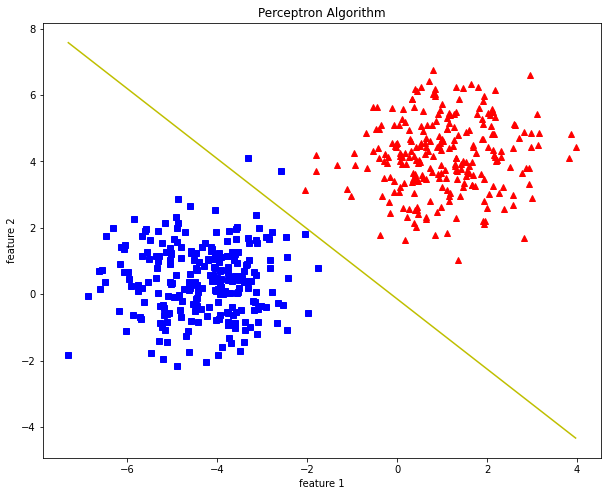

In [21]:
## Plot the result
x1 = [min(X[:,0]), max(X[:,0])]
m = -w1/w2
c = -b/w2
x2 = np.dot(m, x1) + c
    
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Perceptron Algorithm')
plt.plot(x1, x2, 'y-')

-----------------------------------
----------------------------------
## Implement Problem 4 part a

In [22]:
df = pd.read_csv('humans.csv')

In [23]:
df

,Height,Weight,Eyes color,Hair color,Shoe size,Skin color,Number
0,180,60,black,blond,42,black,1
1,170,60,black,blond,42,black,2
2,200,90,green,brown,43,black,3
3,170,80,brown,black,45,white,4
4,130,40,blue,blond,45,white,5
5,190,60,black,black,41,white,6
6,180,80,brown,black,40,black,7
7,200,70,green,brown,41,white,8
8,210,40,green,blond,40,black,9
9,130,70,blue,brown,40,black,10


In [24]:
df['Weight']

0    60
1    60
2    90
3    80
4    40
5    60
6    80
7    70
8    40
9    70
Name: Weight, dtype: int64

In [25]:
def detect_person():
    print('-----------------------------------------------------')
    print('type \"y\" for yes and \"n" for no')
    print('-----------------------------------------------------\n\n\n')
    
    ##########################################
    # filter Skin color
    ans = input('Skin color == black ?')
    
    if (ans == 'y'):
        df2 = df[df['Skin color']=='black']
    elif(ans == 'n'):
        df2 = df[df['Skin color']=='white']
    else:
        print('Wrong input')
        return
    
    
    print('-----------------------------------------------------\n')
    print(df2)
    print('-----------------------------------------------------\n\n')
    
    if(len(df2) == 1):
        return df2.iloc[0,6]
    
    ##########################################
    # filter height
    ans = input('height >= 180 ?')
    
    if (ans == 'y'):
        # drop whites
        df2 = df2[df2['Height'] >= 180]
    elif(ans == 'n'):
        #drop black
        df2 = df2[df2['Height'] < 180]
    else:
        print('Wrong input')
        return
    
    print('-----------------------------------------------------\n')
    print(df2)
    print('-----------------------------------------------------\n\n')
    
    
    if(len(df2) == 1):
        return df2.iloc[0,6]
    
    ##########################################
    # filter weight
    ans = input('weight >= 65  ?')
    
    if (ans == 'y'):
        # drop whites
        df2 = df2[df2['Weight'] >= 65]
    elif(ans == 'n'):
        #drop black
        df2 = df2[df2['Weight'] < 65]
    else:
        print('Wrong input')
        return
    
    
    print('-----------------------------------------------------\n')
    print(df2)
    print('-----------------------------------------------------\n\n')
    
    
    if(len(df2) == 1):
        return df2.iloc[0,6]
    
    
    ##########################################
    # filter Shoe size
    ans = input('shoe size > 41  ?')
    
    if (ans == 'y'):
        # drop whites
        df2 = df2[df2['Shoe size'] > 41]
    elif(ans == 'n'):
        #drop black
        df2 = df2[df2['Shoe size'] <= 41 ]
    else:
        print('Wrong input')
        return
    
    
    print('-----------------------------------------------------\n')
    print(df2)
    print('-----------------------------------------------------\n\n')
    
    
    if(len(df2) == 1):
        return df2.iloc[0,6]

In [26]:
detect_person()

-----------------------------------------------------
type "y" for yes and "n" for no
-----------------------------------------------------



Skin color == black ?y
-----------------------------------------------------

   Height  Weight Eyes color Hair color  Shoe size Skin color  Number
0     180      60      black      blond         42      black       1
1     170      60      black      blond         42      black       2
2     200      90      green      brown         43      black       3
6     180      80      brown      black         40      black       7
8     210      40      green      blond         40      black       9
9     130      70       blue      brown         40      black      10
-----------------------------------------------------


height >= 180 ?n
-----------------------------------------------------

   Height  Weight Eyes color Hair color  Shoe size Skin color  Number
1     170      60      black      blond         42      black       2
9     130      70    

10